<a href="https://colab.research.google.com/github/cemsanga/MAT555E_Assignments/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from sklearn.linear_model import Ridge,RidgeCV,Lasso,LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import tensorflow as tf
import keras as ks
from keras.layers import Dense
from keras.utils import np_utils
from keras.models import Sequential

In [11]:
def compare(a,b):
    for i,k in zip(a,b):
        print(i,k)
    
def compare_plot(pred,test,fig_name):
    score = r2_score(test,pred)
    plt.scatter(np.arange(len(pred[1:-1:150])),pred[1:-1:150],marker="x",label = "Predicted Data",color="blue")
    plt.scatter(np.arange(len(test[1:-1:150])),test[1:-1:150],marker="P",label = "Real Data",color ="darkorange")
    
    ax =plt.gca()
    ax.axes.xaxis.set_ticks([])

    plt.legend()
    plt.ylabel("Atomization Energy (eV)",rotation=90)
    plt.xlabel("Target Variable Data Points")
    plt.title(r"$R^2$ ="+" "+str(score)[:6]+"\n"+str(fig_name))
    plt.savefig(str(fig_name)+".png")
    plt.show()
    
minmax = MinMaxScaler()
standard = StandardScaler()
original_data = pd.read_csv("roboBohr.csv")
original_data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1267,1268,1269,1270,1271,1272,1273,1274,pubchem_id,Eat
0,0,73.516695,17.817765,12.469551,12.458130,12.454607,12.447345,12.433065,12.426926,12.387474,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,25004,-19.013763
1,1,73.516695,20.649126,18.527789,17.891535,17.887995,17.871731,17.852586,17.729842,15.864270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25005,-10.161019
2,2,73.516695,17.830377,12.512263,12.404775,12.394493,12.391564,12.324461,12.238106,10.423249,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25006,-9.376619
3,3,73.516695,17.875810,17.871259,17.862402,17.850920,17.850440,12.558105,12.557645,12.517583,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25009,-13.776438
4,4,73.516695,17.883818,17.868256,17.864221,17.818540,12.508657,12.490519,12.450098,10.597068,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25011,-8.537140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16237,16268,73.516695,20.753166,18.624076,17.872009,17.851690,17.851254,17.742176,14.655754,12.706683,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74976,-8.876123
16238,16269,73.516695,20.724740,18.579933,17.741621,14.716676,13.697829,13.697558,13.653512,13.652942,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74977,-13.105268
16239,16270,53.358707,20.820797,19.150234,19.148721,15.135514,15.123685,12.942704,12.938162,12.488633,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74978,-16.801464
16240,16271,53.358707,15.707759,15.707644,13.653838,13.653570,13.653314,13.652591,13.652585,13.652550,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74979,-13.335088


In [12]:
data = original_data.drop(columns=["Unnamed: 0","pubchem_id"])
data

,0,1,2,3,4,5,6,7,8,9,...,1266,1267,1268,1269,1270,1271,1272,1273,1274,Eat
0,73.516695,17.817765,12.469551,12.458130,12.454607,12.447345,12.433065,12.426926,12.387474,12.365984,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,-19.013763
1,73.516695,20.649126,18.527789,17.891535,17.887995,17.871731,17.852586,17.729842,15.864270,15.227643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-10.161019
2,73.516695,17.830377,12.512263,12.404775,12.394493,12.391564,12.324461,12.238106,10.423249,8.698826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-9.376619
3,73.516695,17.875810,17.871259,17.862402,17.850920,17.850440,12.558105,12.557645,12.517583,12.444141,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-13.776438
4,73.516695,17.883818,17.868256,17.864221,17.818540,12.508657,12.490519,12.450098,10.597068,10.595914,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.537140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16237,73.516695,20.753166,18.624076,17.872009,17.851690,17.851254,17.742176,14.655754,12.706683,12.557785,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.876123
16238,73.516695,20.724740,18.579933,17.741621,14.716676,13.697829,13.697558,13.653512,13.652942,13.652387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-13.105268
16239,53.358707,20.820797,19.150234,19.148721,15.135514,15.123685,12.942704,12.938162,12.488633,12.488061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-16.801464
16240,53.358707,15.707759,15.707644,13.653838,13.653570,13.653314,13.652591,13.652585,13.652550,12.743890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-13.335088


In [13]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1].to_numpy()

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

X_train_std = standard.fit_transform(X_train)
X_test_std = standard.fit_transform(X_test)

X_train_mm = minmax.fit_transform(X_train)
X_test_mm = minmax.fit_transform(X_test)

In [96]:
alphas = [0.1,0.2,0.5,1,10,20,50,100,200,500]
alphas_log = np.logspace(-4, 4, 14)
alphas_log

array([1.00000000e-04, 4.12462638e-04, 1.70125428e-03, 7.01703829e-03,
       2.89426612e-02, 1.19377664e-01, 4.92388263e-01, 2.03091762e+00,
       8.37677640e+00, 3.45510729e+01, 1.42510267e+02, 5.87801607e+02,
       2.42446202e+03, 1.00000000e+04])

# Kernel Ridge

## Original Data

In [16]:
def Kernel(X_train,y_train,X_test,y_test): 
    global y_pred_kr
    model_kernel = KernelRidge(alpha=20.0)
    model_kernel.fit(X_train,y_train)
    y_pred_kr = model_kernel.predict(X_test)
    kr_mse = mean_squared_error(y_test,y_pred_kr)
    kr_score = r2_score(y_test,y_pred_kr)
    print("Score=",kr_score,"\n","Error=",kr_mse)
# 150, 1.80
# 2000, 1.65
# 3000, 1.6590

In [17]:
Kernel(X_train,y_train,X_test,y_test)

Score= 0.7948075781967459 
 Error= 2.7851104680719776


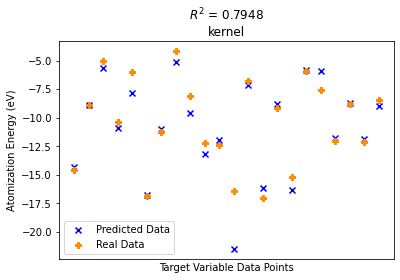

In [18]:
compare_plot(y_pred_kr,y_test,"kernel")

## MinMax Data

In [19]:
Kernel(X_train_mm,y_train,X_test_mm,y_test)

Score= 0.6951060090029014 
 Error= 4.138376254423622


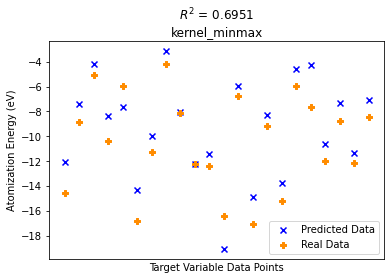

In [20]:
compare_plot(y_pred_kr,y_test,"kernel_minmax")

## Std. Scaled Data

In [21]:
Kernel(X_train_std,y_train,X_test_std,y_test)

Score= -8.290268705239127 
 Error= 126.09834415313995


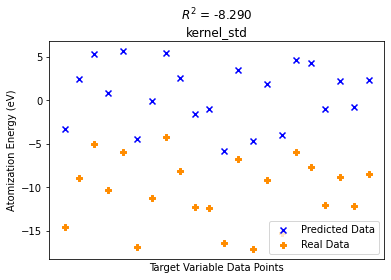

In [22]:
compare_plot(y_pred_kr,y_test,"kernel_std")

# Ridge Regression

## Original Data

In [23]:
def RidgeExp(X_train,X_test,alpha_val):
    global y_pred_ridge
    model_ridge = Ridge(alpha=alpha_val)
    model_ridge.fit(X_train,y_train)
    y_pred_ridge = model_ridge.predict(X_test)
    ridge_error = mean_squared_error(y_test,y_pred_ridge)
    ridge_score = r2_score(y_test,y_pred_ridge)
    print("Score=",ridge_score,"\n","Error=",ridge_error)

In [24]:
#for i in alphas_log:
#    print(i)
#    RidgeExp(i)

# Selected Alpha Values : 587.8016072274924
#                         2424.462017082331

# 587.80 is the best.

In [25]:
RidgeExp(X_train,X_test,587.80)

Score= 0.9543415684921968 
 Error= 0.619729395611205


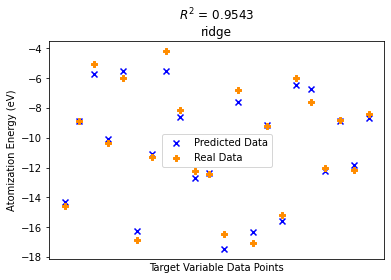

In [26]:
compare_plot(y_pred_ridge,y_test,"ridge")

## MinMax Data

In [27]:
RidgeExp(X_train_mm,X_test_mm,587.80)

Score= 0.5679596804313025 
 Error= 5.864154270832137


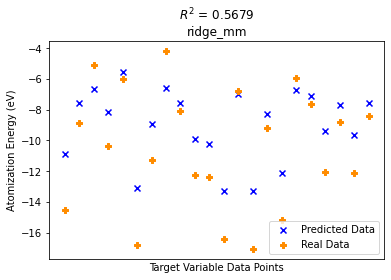

In [28]:
compare_plot(y_pred_ridge,y_test,"ridge_mm")

## Std. Scaled Data

In [29]:
RidgeExp(X_train_std,X_test_std,587.80)

Score= 0.9475026016200853 
 Error= 0.7125558170692959


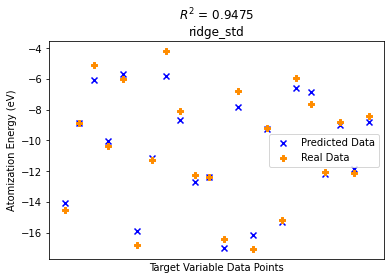

In [30]:
compare_plot(y_pred_ridge,y_test,"ridge_std")

# Lasso

## Original Data

In [31]:
def LassoExp(X_train,X_test,alpha_val):
    global y_pred_lasso
    model_lasso = Lasso(max_iter = 10**4,alpha=alpha_val)
    model_lasso.fit(X_train,y_train)
    y_pred_lasso = model_lasso.predict(X_test)
    lasso_error = mean_squared_error(y_test,y_pred_lasso)
    lasso_score = r2_score(y_test,y_pred_lasso)
    print("Score=",lasso_score,"\n","Error=",lasso_error)

In [32]:
for i in alphas_log[4:8]:
    print("Alpha=",i)
    LassoExp(X_train,X_test,i)

Alpha= 0.028942661247167517
Score= 0.9348479513516612 
 Error= 0.8843194651740565
Alpha= 0.1193776641714437
Score= 0.8646421456723128 
 Error= 1.8372344052027028
Alpha= 0.49238826317067413
Score= 0.7874386541010026 
 Error= 2.885130086034092
Alpha= 2.030917620904739
Score= 0.7717876346213297 
 Error= 3.0975639459484268


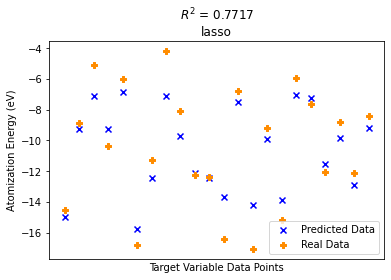

In [33]:
compare_plot(y_pred_lasso,y_test,"lasso")

## MinMax Data

In [34]:
LassoExp(X_train_mm,X_test_mm,i)

Score= -4.818961356178875e-06 
 Error= 13.57322977591333


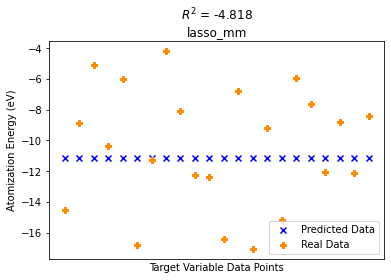

In [35]:
compare_plot(y_pred_lasso,y_test,"lasso_mm")

## Std. Scaled Data

In [36]:
LassoExp(X_train_std,X_test_std,i)

Score= 0.4592490429408119 
 Error= 7.339701621970921


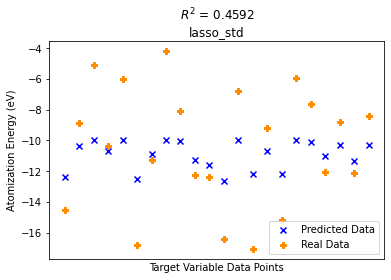

In [37]:
compare_plot(y_pred_lasso,y_test,"lasso_std")

# Ridge with Cross-Validation

## Original Data

In [38]:
def RidgeCVExp(X_train,y_train,X_test,y_test):
    global y_pred_ridgecv
    model_ridgecv = RidgeCV(alphas=alphas_log)
    model_ridgecv.fit(X_train,y_train)
    y_pred_ridgecv = model_ridgecv.predict(X_test)
    ridgecv_error = mean_squared_error(y_test,y_pred_ridgecv)
    ridgecv_score = r2_score(y_test,y_pred_ridgecv)
    print("Score=",ridgecv_score,"\n","Error=",ridgecv_error)

In [39]:
RidgeCVExp(X_train,y_train,X_test,y_test)

Score= 0.8044872411515771 
 Error= 2.6537268117654205


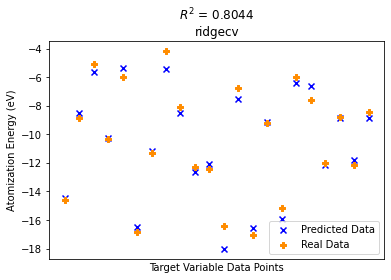

In [40]:
compare_plot(y_pred_ridgecv,y_test,"ridgecv")

## MinMax Data

In [41]:
RidgeCVExp(X_train_mm,y_train,X_test_mm,y_test)

Score= 0.7871903839655123 
 Error= 2.888499897390609


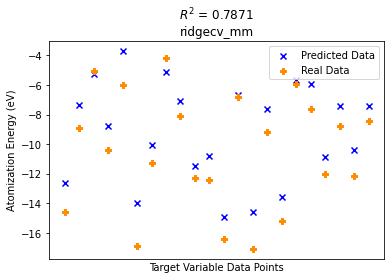

In [42]:
compare_plot(y_pred_ridgecv,y_test,"ridgecv_mm")

## Std. Scaled Data

In [43]:
RidgeCVExp(X_train_std,y_train,X_test_std,y_test)

Score= 0.9445815914783816 
 Error= 0.7522031678413623


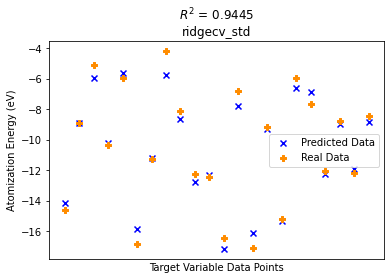

In [44]:
compare_plot(y_pred_ridgecv,y_test,"ridgecv_std")

# LassoCV

## Original Data

In [48]:
def LassoCVExp(X_train,y_train,X_test,y_test):
    global y_pred_lassocv
    model_lassocv = LassoCV(max_iter=10**6, alphas=alphas_log)
    model_lassocv.fit(X_train,y_train)
    y_pred_lassocv = model_lassocv.predict(X_test)
    lassocv_error = mean_squared_error(y_test,y_pred_lassocv)
    lassocv_score = r2_score(y_test,y_pred_lassocv)
    print("Score=",lassocv_score,"\n","Error=",lassocv_error)

In [49]:
LassoCVExp(X_train,y_train,X_test,y_test)

Score= 0.9348479513516612 
 Error= 0.8843194651740565


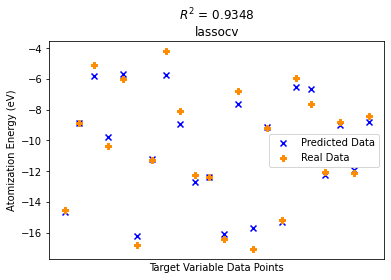

In [50]:
compare_plot(y_pred_lassocv,y_test,"lassocv")

## MinMaxData

In [51]:
LassoCVExp(X_train_mm,y_train,X_test_mm,y_test)

Score= 0.7728560483875612 
 Error= 3.083062190287018


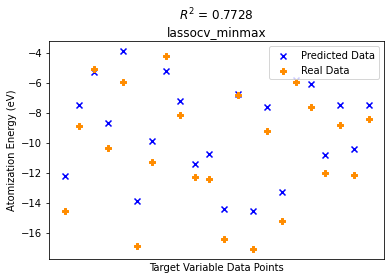

In [52]:
compare_plot(y_pred_lassocv,y_test,"lassocv_minmax")

## Std. Scaled Data

In [53]:
LassoCVExp(X_train_std,y_train,X_test_std,y_test)

Score= 0.9213305599607838 
 Error= 1.0677932403403554


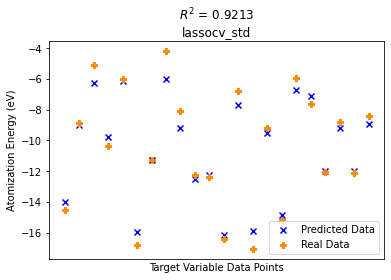

In [54]:
compare_plot(y_pred_lassocv,y_test,"lassocv_std")

# Support Vector Regression

In [55]:
def SVRExp(X_train,X_test):
    global pred_svm
    model_svr = SVR(kernel="rbf")
    model_svr.fit(X_train,y_train)
    pred_svm = model_svr.predict(X_test)
    score = r2_score(pred_svm,y_test)
    print(score)


## Original Data

In [56]:
SVRExp(X_train,X_test)

0.9804528258306725


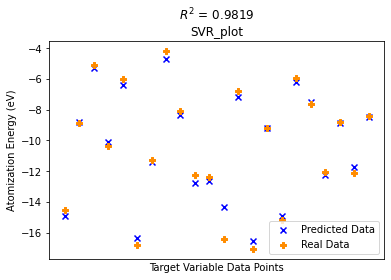

In [57]:
compare_plot(pred_svm,y_test,"SVR_plot")

## MinMax

In [58]:
SVRExp(X_train_mm,X_test_mm)

0.9417416135823121


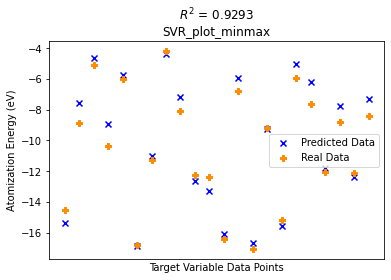

In [59]:
compare_plot(pred_svm,y_test,"SVR_plot_minmax")

## Std. Scaled Data

In [60]:
SVRExp(X_train_std,X_test_std)

0.9859692065461165


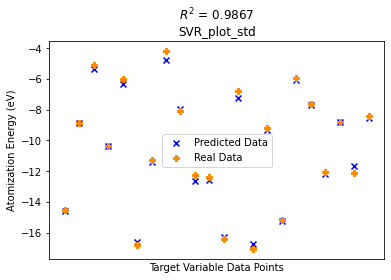

In [61]:
compare_plot(pred_svm,y_test,"SVR_plot_std")

# KNN

In [62]:
def KNNexp(X_train,y_train,X_test,y_test,N):
    global pred
    model_KNN = KNeighborsRegressor(n_neighbors=N)
    model_KNN.fit(X_train,y_train)
    pred = model_KNN.predict(X_test)
    score = r2_score(pred,y_test)
    print("Score = ",score)


## Original Data

In [63]:
KNNexp(X_train,y_train,X_test,y_test,10)

Score =  0.961560999094339


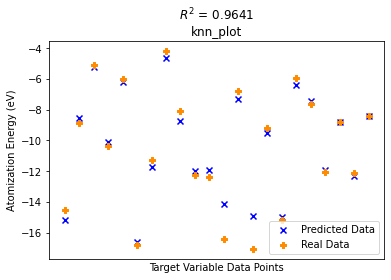

In [64]:
compare_plot(pred,y_test,"knn_plot")

## MinMax Data

In [65]:
KNNexp(X_train_mm,y_train,X_test_mm,y_test,10)

Score =  0.943327389430883


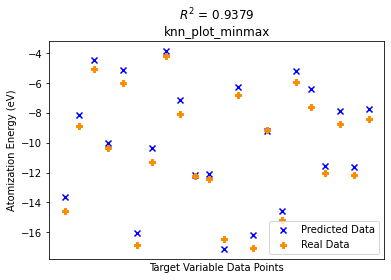

In [66]:
compare_plot(pred,y_test,"knn_plot_minmax")

## Std. Scaled Data

In [67]:
KNNexp(X_train_std,y_train,X_test_std,y_test,10)

Score =  0.993944181370908


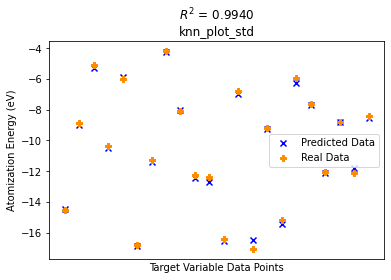

In [68]:
compare_plot(pred,y_test,"knn_plot_std")

# Decision Trees

In [69]:
def DTexp(X_train,y_train,X_test,y_test,depth):
    global pred
    model_dt = DecisionTreeRegressor(max_depth=depth)
    model_dt.fit(X_train,y_train)
    pred = model_dt.predict(X_test)
    print(r2_score(y_test,pred))
    

In [70]:
def DTexp_minsample(X_train,y_train,X_test,y_test,depth):
    model_dt = DecisionTreeRegressor(min_samples_split=5)
    model_dt.fit(X_train,y_train)
    pred = model_dt.predict(X_test)
    score = r2_score(pred,y_test)
    return pred

In [71]:
DTexp(X_train,y_train,X_test,y_test,10)

0.9963001262473653


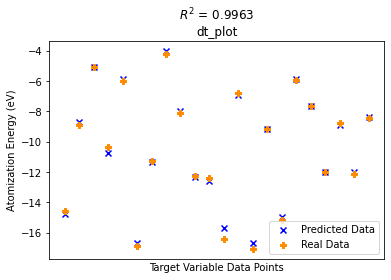

In [72]:
compare_plot(pred,y_test,"dt_plot")

## MinMax Data

In [73]:
DTexp(X_train_mm,y_train,X_test_mm,y_test,10)

0.9921822695528284


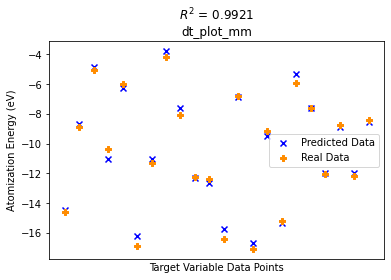

In [74]:
compare_plot(pred,y_test,"dt_plot_mm")

## Std. Scaled Data

In [75]:
DTexp(X_train_std,y_train,X_test_std,y_test,10)

0.9932596730940714


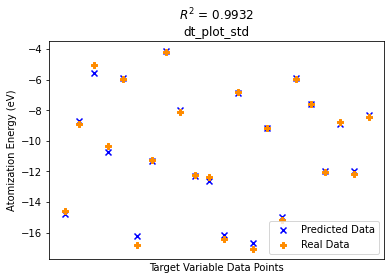

In [76]:
compare_plot(pred,y_test,"dt_plot_std")

# XGBoost

In [77]:
def XGB(X_train,X_test):
    global pred
    model = XGBRegressor()
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    score = r2_score(y_test,pred)
    print(score)

In [78]:
XGB(X_train,X_test)

[18:20:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9986067621590289


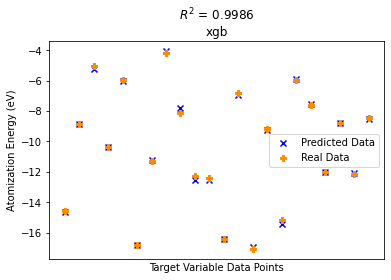

In [79]:
compare_plot(pred,y_test,"xgb")

## MinMax Data

In [80]:
XGB(X_train_mm,X_test_mm)

[18:20:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9842195266684683


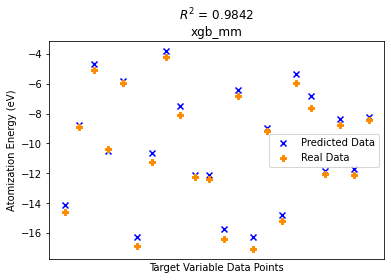

In [81]:
compare_plot(pred,y_test,"xgb_mm")

## Std. Scaled Data

In [82]:
XGB(X_train_std,X_test_std)

[18:21:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9966656233857084


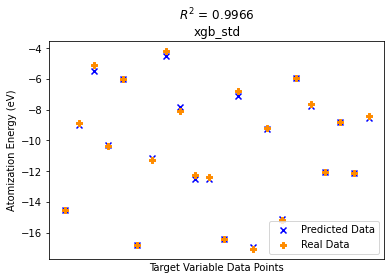

In [83]:
compare_plot(pred,y_test,"xgb_std")